In [1]:
import pandas as pd
from rdkit import Chem

analogs = pd.read_pickle('fragmenstein_A71.plk.gz')

In [38]:
import pandas as pd
import numpy as np
import numpy.typing as npt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
import plotly.express as px

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in analogs.minimized_mol]
fp_array: npt.NDArray[bool] = np.array([list(fp) for fp in fps])

tsne = TSNE(n_components=2, random_state=42, metric='hamming')
tsne_results = tsne.fit_transform(fp_array)

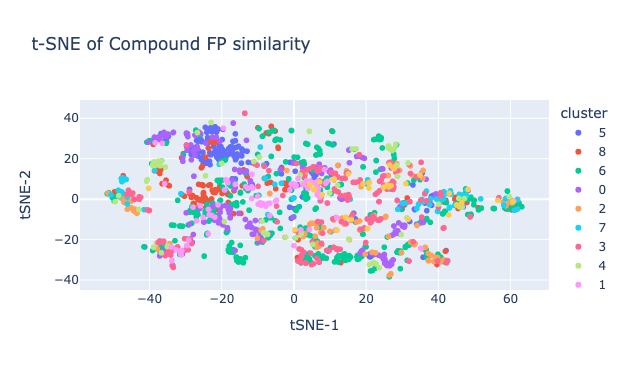

In [40]:
tsne_df = pd.DataFrame(tsne_results, columns=['tSNE-1', 'tSNE-2'])
tsne_df['cluster'] = analogs.cluster_label.astype(str).to_list()
fig = px.scatter(tsne_df, x='tSNE-1', y='tSNE-2', 
                 color='cluster',
                 title='t-SNE of Compound FP similarity')
fig.show()

In [16]:
analogs.cluster_label.value_counts()

cluster_label
6    449
5    204
0    199
3    194
8    150
2    115
7     81
4     78
1     77
9     36
Name: count, dtype: int64

In [ ]:
import colorsys

def generate_diverse_colors(n):
    saturation = 1.0
    value = 1.0
    hues = [float(i)/n for i in range(n)]
    return ['#%02x%02x%02x' % tuple(int(x * 255) for x in colorsys.hsv_to_rgb(hue, saturation, value)) for hue in hues]

def catalogize(name):
    if name[0] == 'Z':
        return name.split('-')[0]
    if name[0] == 'P':
        return 'PV-'+name.split('-')[1]
    else:
        return name

analogs['catalog_id'] = analogs.name.apply(catalogize)

#print cmd.get_names()
colors = generate_diverse_colors( 10 )
for name, cluster in zip(analogs.head(200).name, analogs.cluster_label):
    print(f'color 0x{colors[cluster][1:]}, {catalogize(name).replace("-","_")} and element C')

In [ ]:
print('set grid_mode,1')
for name, cluster in zip(analogs.head(200).name, analogs.cluster_label):
    print(f'set grid_slot, {cluster+1}, {catalogize(name).replace("-","_")}')

In [ ]:
for name, cluster in zip(analogs.head(200).name, analogs.cluster_label):
    print(f'disable {catalogize(name).replace("-","_")}')

In [36]:
for i in range(9):
    print(f'create tcopy{i}, template2')
    print(f'set grid_slot, {1+i}, tcopy{i}')

create tcopy0, template2
set grid_slot, 1, tcopy0
create tcopy1, template2
set grid_slot, 2, tcopy1
create tcopy2, template2
set grid_slot, 3, tcopy2
create tcopy3, template2
set grid_slot, 4, tcopy3
create tcopy4, template2
set grid_slot, 5, tcopy4
create tcopy5, template2
set grid_slot, 6, tcopy5
create tcopy6, template2
set grid_slot, 7, tcopy6
create tcopy7, template2
set grid_slot, 8, tcopy7
create tcopy8, template2
set grid_slot, 9, tcopy8


In [41]:
len(analogs)

1583

In [42]:
!ls repo/results/A71-ROCS-cov.sdf

A71-ROCS-cov.sdf                mergers_itxn_clusters-zoom.png
A71-ROCS-mixed.sdf              mergers_itxn_clusters.png
A71_fragmenstein_clustered4.sdf


In [49]:
vcs = []
group = []
path = 'repo/results/'
for name, filename in [('ROCS-covalent', path+'A71-ROCS-cov.sdf'),
                       ('ROCS-mixed', path+'A71-ROCS-mixed.sdf'),
                       ('Fragmenstein', path+'A71_fragmenstein_clustered4.sdf')
                      ]:
    with Chem.SDMolSupplier(filename) as sdfh:
        new = list(sdfh)
        vcs.extend(new)
        group.extend([name] * len(new))


In [46]:
import pandas as pd
import numpy as np
import numpy.typing as npt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
import plotly.express as px

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in vcs]
fp_array: npt.NDArray[bool] = np.array([list(fp) for fp in fps])
tsne = TSNE(n_components=2, random_state=42, metric='hamming')
tsne_results = tsne.fit_transform(fp_array)

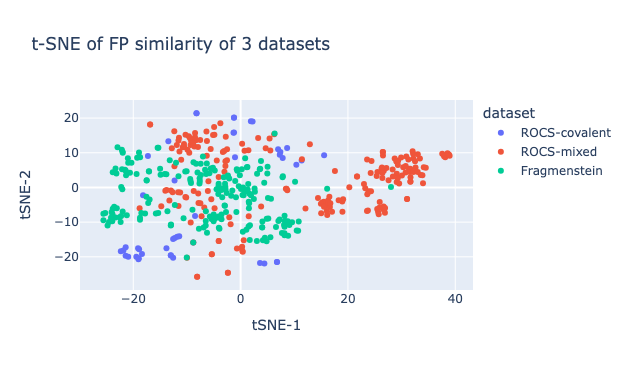

In [51]:
tsne_df = pd.DataFrame(tsne_results, columns=['tSNE-1', 'tSNE-2'])
tsne_df['dataset'] = group
fig = px.scatter(tsne_df, x='tSNE-1', y='tSNE-2', 
                 color='dataset',
                 title='t-SNE of FP similarity of 3 datasets')
fig.show()

In [56]:
fp_array: npt.NDArray[bool] = analogs[[col for col in analogs.columns if isinstance(col, tuple)]].values
tsne = TSNE(n_components=2, random_state=42, metric='manhattan')
tsne_results = tsne.fit_transform(fp_array)

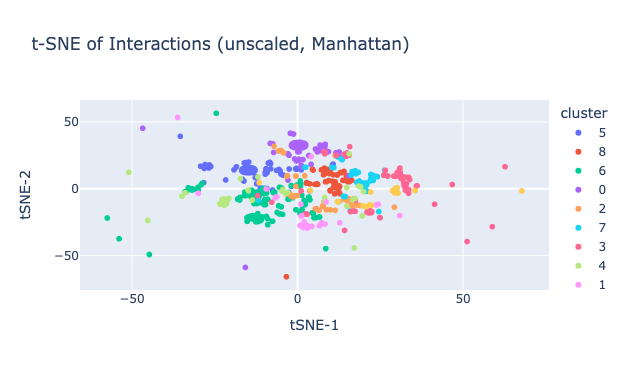

In [59]:
tsne_df = pd.DataFrame(tsne_results, columns=['tSNE-1', 'tSNE-2'])
tsne_df['cluster'] = analogs.cluster_label.astype(str).to_list()
fig = px.scatter(tsne_df, x='tSNE-1', y='tSNE-2', 
                 color='cluster',
                 title='t-SNE of Interactions (unscaled, Manhattan)')
fig.show()